# WeatherPy

### Analysis
-  Too be completed
-  Too be completed
-  Too be completed
-  Too be completed

In [1]:
#Install citipy library
!pip install citipy

#Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from pprint import pprint
import time

#Import API key for OpenWeatherMapy
from config import owm_key

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Generate Cities List

In [2]:
#Create DataFrame
cities_df = pd.DataFrame()

#Add columns for City and Country
cities_df["City"] = ""
cities_df["Country"] = ""

#Generate 500+ random latitudes and longitudes, then add new columns and values to Dataframe
cities_df["Latitude"] = np.random.uniform(low=-90, high=90, size=1500)
cities_df["Longitude"] = np.random.uniform(low=-180, high=180, size=1500)
cities_df = round(cities_df, 2)

#Add columns to DataFrame for wanted values
cities_df["Temperature (F)"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Cloudiness (%)"] = ""
cities_df["Wind Speed (mph)"] = ""

#Find and add nearest city & country based on the randomly selected lat and lng
for index, row in cities_df.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)

#Drop duplicate cities
cities_df.drop_duplicates(["City", "Country"], inplace=True)
cities_df.reset_index(inplace=True)

#Delete unneccesary column for aesthetics 
del cities_df["index"]

#Display updated DataFrame
cities_df.head()

C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,the valley,ai,19.10,-63.68,,,,
1,khormuj,ir,28.98,51.89,,,,
2,nikolskoye,ru,49.15,169.50,,,,
3,puerto ayora,ec,-15.46,-99.32,,,,
4,hobart,au,-89.82,143.75,,,,


In [3]:
#Check to be sure we have 500+ cities for dataset
len(cities_df)

639

### Perform API Calls

In [4]:
#Config info
units = "imperial"

#Access the data from openweathermapy
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

for index, row in cities_df.iterrows():
    #Target URL
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=%s,%s&units=%s&appid=%s" % (row["City"], row["Country"], units, owm_key)
    
    #Print log of cities being processed
    print(f"Now retrieving City #" + str(index) + ": " + row["City"] + ", " + row["Country"])
    print(query_url)
    
    #Run requests to API
    weather_data = requests.get(query_url).json()
    
    #Use exceptional handling  to calculate and append values to DataFrame
    try:
        response = weather_data
        cities_df.set_value(index, "Temperature (F)", response["main"]["temp"])
        cities_df.set_value(index, "Humidity (%)", response["main"]["humidity"])
        cities_df.set_value(index, "Cloudiness (%)", response["clouds"]["all"])
        cities_df.set_value(index, "Wind Speed (mph)", response["wind"]["speed"])
    except:
        print("Error with city data... Skipping")
    
    
print("---------------------------------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------------------------------")  

#Covert strings to floats for DataFrame
columns = ["Latitude", "Longitude", "Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (mph)"]
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors="coerce")

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving City #0: the valley, ai
http://api.openweathermap.org/data/2.5/weather?q=the valley,ai&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f


C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\austi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retrieving City #1: khormuj, ir
http://api.openweathermap.org/data/2.5/weather?q=khormuj,ir&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #2: nikolskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=nikolskoye,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #3: puerto ayora, ec
http://api.openweathermap.org/data/2.5/weather?q=puerto ayora,ec&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #4: hobart, au
http://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #5: soe, id
http://api.openweathermap.org/data/2.5/weather?q=soe,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #6: rikitea, pf
http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #7: vaini, to
http://api.openweathermap.o

Now retrieving City #54: geraldton, ca
http://api.openweathermap.org/data/2.5/weather?q=geraldton,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #55: januaria, br
http://api.openweathermap.org/data/2.5/weather?q=januaria,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #56: zhanaozen, kz
http://api.openweathermap.org/data/2.5/weather?q=zhanaozen,kz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #57: amderma, ru
http://api.openweathermap.org/data/2.5/weather?q=amderma,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #58: korla, cn
http://api.openweathermap.org/data/2.5/weather?q=korla,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #59: carnarvon, au
http://api.openweathermap.org/data/2.5/weather?q=carnarvon,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving Cit

Now retrieving City #106: lincoln, ar
http://api.openweathermap.org/data/2.5/weather?q=lincoln,ar&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #107: zyryanka, ru
http://api.openweathermap.org/data/2.5/weather?q=zyryanka,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #108: sfantu gheorghe, ro
http://api.openweathermap.org/data/2.5/weather?q=sfantu gheorghe,ro&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #109: victoria, sc
http://api.openweathermap.org/data/2.5/weather?q=victoria,sc&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #110: saskylakh, ru
http://api.openweathermap.org/data/2.5/weather?q=saskylakh,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #111: canberra, au
http://api.openweathermap.org/data/2.5/weather?q=canberra,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #112: ribeira grande, pt
http://api.openwe

Now retrieving City #160: perevolotskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=perevolotskiy,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #161: scunthorpe, gb
http://api.openweathermap.org/data/2.5/weather?q=scunthorpe,gb&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #162: camacha, pt
http://api.openweathermap.org/data/2.5/weather?q=camacha,pt&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #163: tuktoyaktuk, ca
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #164: new norfolk, au
http://api.openweathermap.org/data/2.5/weather?q=new norfolk,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #165: morondava, mg
http://api.openweathermap.org/data/2.5/weather?q=morondava,mg&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #166: severo-kurilsk, ru
http:

Now retrieving City #212: mersing, my
http://api.openweathermap.org/data/2.5/weather?q=mersing,my&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #213: upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #214: waingapu, id
http://api.openweathermap.org/data/2.5/weather?q=waingapu,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #215: fernley, us
http://api.openweathermap.org/data/2.5/weather?q=fernley,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #216: port blair, in
http://api.openweathermap.org/data/2.5/weather?q=port blair,in&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #217: cotonou, bj
http://api.openweathermap.org/data/2.5/weather?q=cotonou,bj&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #218: banda aceh, id
http://api.openweathermap.org/data/

Now retrieving City #265: illoqqortoormiut, gl
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #266: linqiong, cn
http://api.openweathermap.org/data/2.5/weather?q=linqiong,cn&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #267: kohlu, pk
http://api.openweathermap.org/data/2.5/weather?q=kohlu,pk&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #268: codrington, ag
http://api.openweathermap.org/data/2.5/weather?q=codrington,ag&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #269: makat, kz
http://api.openweathermap.org/data/2.5/weather?q=makat,kz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #270: erzin, ru
http://api.openweathermap.org/data/2.5/weather?q=erzin,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retr

Now retrieving City #318: adrar, dz
http://api.openweathermap.org/data/2.5/weather?q=adrar,dz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #319: meulaboh, id
http://api.openweathermap.org/data/2.5/weather?q=meulaboh,id&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #320: nishihara, jp
http://api.openweathermap.org/data/2.5/weather?q=nishihara,jp&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #321: port-cartier, ca
http://api.openweathermap.org/data/2.5/weather?q=port-cartier,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #322: lorengau, pg
http://api.openweathermap.org/data/2.5/weather?q=lorengau,pg&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #323: narsaq, gl
http://api.openweathermap.org/data/2.5/weather?q=narsaq,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #324: mys shmidta, ru
http://api.openweathermap.org/data

Now retrieving City #371: chitipa, mw
http://api.openweathermap.org/data/2.5/weather?q=chitipa,mw&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #372: dunedin, nz
http://api.openweathermap.org/data/2.5/weather?q=dunedin,nz&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #373: harper, lr
http://api.openweathermap.org/data/2.5/weather?q=harper,lr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #374: saint-esteve, fr
http://api.openweathermap.org/data/2.5/weather?q=saint-esteve,fr&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #375: ambilobe, mg
http://api.openweathermap.org/data/2.5/weather?q=ambilobe,mg&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #376: karancskeszi, hu
http://api.openweathermap.org/data/2.5/weather?q=karancskeszi,hu&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #377: sao luiz gonzaga, br
http://api.openweathe

Error with city data... Skipping
Now retrieving City #424: leirvik, fo
http://api.openweathermap.org/data/2.5/weather?q=leirvik,fo&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #425: santa lucia, es
http://api.openweathermap.org/data/2.5/weather?q=santa lucia,es&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #426: elat, il
http://api.openweathermap.org/data/2.5/weather?q=elat,il&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #427: airai, pw
http://api.openweathermap.org/data/2.5/weather?q=airai,pw&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #428: geraldton, au
http://api.openweathermap.org/data/2.5/weather?q=geraldton,au&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #429: rabo de peixe, pt
http://api.openweathermap.org/data/2.5/weather?q=rabo de peixe

Now retrieving City #475: almaznyy, ru
http://api.openweathermap.org/data/2.5/weather?q=almaznyy,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #476: davidson, ca
http://api.openweathermap.org/data/2.5/weather?q=davidson,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #477: asau, tv
http://api.openweathermap.org/data/2.5/weather?q=asau,tv&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #478: aybak, af
http://api.openweathermap.org/data/2.5/weather?q=aybak,af&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #479: paradwip, in
http://api.openweathermap.org/data/2.5/weather?q=paradwip,in&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #480: cocobeach, ga
http://api.openweathermap.org/data/2.5/weather?q=cocobeach,ga&units=imperial&appid=bec2deb1e63f486b3e900d

Now retrieving City #529: attawapiskat, ca
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat,ca&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #530: vestmannaeyjar, is
http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #531: aripuana, br
http://api.openweathermap.org/data/2.5/weather?q=aripuana,br&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #532: traverse city, us
http://api.openweathermap.org/data/2.5/weather?q=traverse city,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #533: lucapa, ao
http://api.openweathermap.org/data/2.5/weather?q=lucapa,ao&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #534: kpandae, gh
http://api.openweathermap.org/data/2.5/weather?q=kpandae,gh&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City

Now retrieving City #580: goure, ne
http://api.openweathermap.org/data/2.5/weather?q=goure,ne&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #581: krutinka, ru
http://api.openweathermap.org/data/2.5/weather?q=krutinka,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #582: grand river south east, mu
http://api.openweathermap.org/data/2.5/weather?q=grand river south east,mu&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #583: lhuntshi, bt
http://api.openweathermap.org/data/2.5/weather?q=lhuntshi,bt&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrieving City #584: bam, ir
http://api.openweathermap.org/data/2.5/weather?q=bam,ir&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #585: huntington, us
http://api.openweathermap.org/data/2.5/weather?q=huntington,us&units=imperial&appid=bec2deb1e63f486b3e900db56c9

Now retrieving City #632: sinegorye, ru
http://api.openweathermap.org/data/2.5/weather?q=sinegorye,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #633: leningradskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #634: raudeberg, no
http://api.openweathermap.org/data/2.5/weather?q=raudeberg,no&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #635: ilulissat, gl
http://api.openweathermap.org/data/2.5/weather?q=ilulissat,gl&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #636: novaya igirma, ru
http://api.openweathermap.org/data/2.5/weather?q=novaya igirma,ru&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Now retrieving City #637: abu samrah, qa
http://api.openweathermap.org/data/2.5/weather?q=abu samrah,qa&units=imperial&appid=bec2deb1e63f486b3e900db56c9f377f
Error with city data... Skipping
Now retrievin

In [5]:
#Drop NaN values from DataFrame
cities_df.dropna(inplace=True)

#Display final DataFrame
cities_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,the valley,ai,19.10,-63.68,77.00,73.0,20.0,10.29
2,nikolskoye,ru,49.15,169.50,23.00,85.0,90.0,8.95
3,puerto ayora,ec,-15.46,-99.32,78.26,100.0,0.0,6.17
4,hobart,au,-89.82,143.75,57.20,71.0,75.0,20.80
5,soe,id,-10.80,124.90,78.35,76.0,80.0,2.59


In [6]:
#Check for missing values in DataFrame
cities_df.count()

City                562
Country             562
Latitude            562
Longitude           562
Temperature (F)     562
Humidity (%)        562
Cloudiness (%)      562
Wind Speed (mph)    562
dtype: int64

In [7]:
#Export DataFrame as CSV
cities_df.to_csv("Output/city_weather_info.csv")

### Latitude vs Temperature Plot

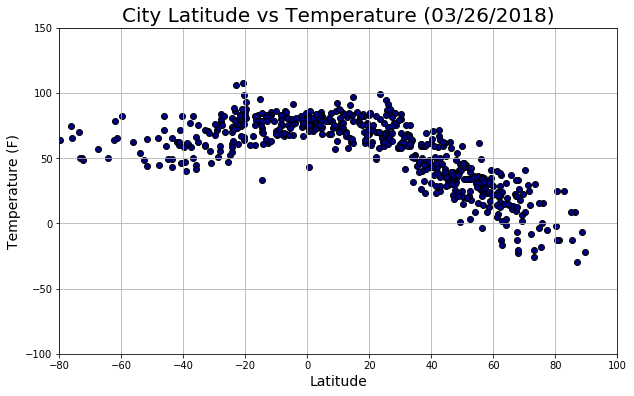

In [8]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Temperature (F)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="navy", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Temperature " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Temperature (F)", fontsize=14)
plt.ylim(-100,150)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Temperature.png")

plt.grid()
plt.show()

### Latitude vs Humidity Plot

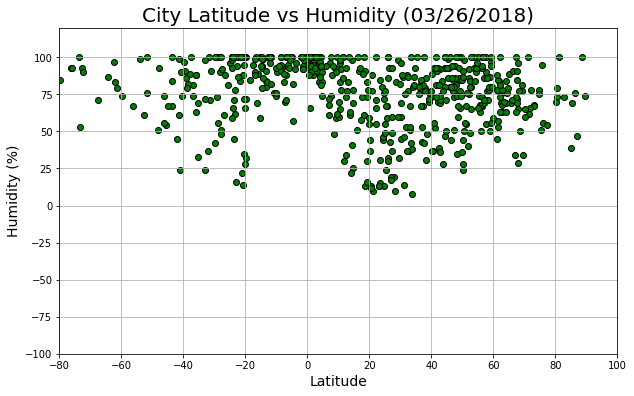

In [9]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Humidity (%)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="green", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Humidity " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Humidity (%)", fontsize=14)
plt.ylim(-100,120)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Humidity.png")

plt.grid()
plt.show()

### Latitude vs Cloudiness Plot

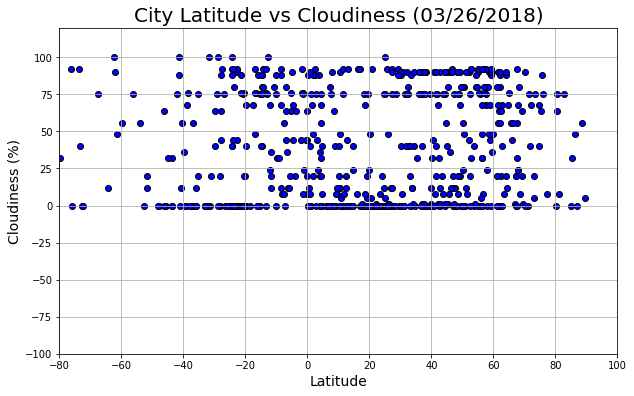

In [10]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Cloudiness (%)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="blue", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Cloudiness " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.ylim(-100,120)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_Cloudiness.png")

plt.grid()
plt.show()

### Latitude vs Wind Speed Plot

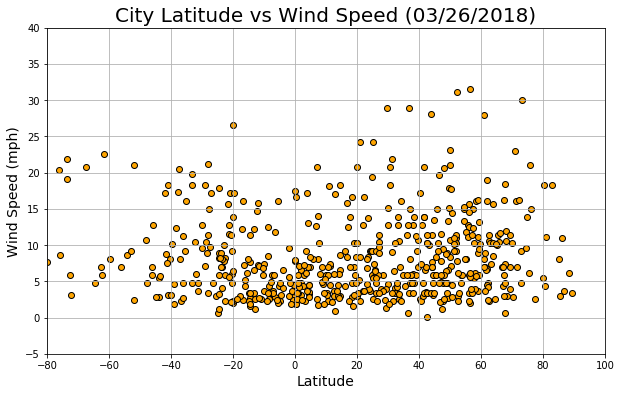

In [11]:
#Define axis values
x_axis = cities_df["Latitude"]
y_axis = cities_df["Wind Speed (mph)"]

#Set size of scatter plots
plt.figure(figsize=(10,6))

#Create scatter plot
plt.scatter(x_axis, y_axis, color="orange", edgecolors="black")

#Aesthetics
plt.title("City Latitude vs Wind Speed " + "(" + time.strftime("%m/%d/%Y") + ")", fontsize=20)
plt.xlabel("Latitude", fontsize=14)
plt.xlim(-80,100)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.ylim(-5,40)

#Save plot as PNG image
plt.savefig("Images/Latitude_vs_WindSpeed.png")

plt.grid()
plt.show()